## Introduction

Consumer credit worthiness is the most important aspect of financial institutions. It decides whether a borrower can be trusted to pay his or her debts back. Because of the rapid growth in the credit industry and the increasing volume of loan applications, organizations are depending on sophisticated techniques to automate the credit approval method.

This project aims to find the credit worthiness of the customers. Some variables affect credit worthiness such as repayment history, credit score, available assets, and, the number of liabilities. The given dataset has been explored first to find the basic information about the data and then data cleaning has been done for better analysis. Exploratory data analysis has been performed on different variables of the data.


## Features Description

The dataset is based on the “Statlog Dataset” from the UCI Machine Learning Repository. Different features of the dataset are explained below:

**Age**: Age of the customer. It is a continuous data

**Sex**: Gender of the customer which is male and female. It is nominal data.

**Job**: Job of the customer. It has 4 different values. 0 for unskilled and non-resident, 1 for unskilled and resident, 2 for skilled, and 3 for highly skilled. The data has order but no magnitude. It is an ordinal datatype.

**Housing**: It explains about the house customer is living in. Whether it is owned or rented by the customer. And if the house was given freely to the customer by someone. Its data type is Ordinal.

**Saving accounts**: It is a basic account at a bank that helps to deposit money and ensures safety. It is divided into 4 categories based on its volume which is little, moderate, quite rich, and rich. It is ordinal data.

**Checking account**: It is deposit account at a bank that allows the customer to deposit and withdraw money. It allows several withdrawals and deposits. It is less liquid compared to a savings account. In this project checking account is divided into 3 categories namely little, moderate and rich. It is ordinal data.

**Credit amount**: It is the amount a customer has to pay to clear the debt. It is expressed in the German currency of Deutsche Mark. The type of data is continuous.

**Duration**: Time to repay the credit amount. It is expressed in the number of months. It is discrete data as it does not have intermediate values.

**Purpose**: The purpose for which the customer took the loan. It is divided into the categories of car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others. It is nominal data. 


## Importing required libraries for the data analysis

In [196]:
import numpy as np # Imports numpy, numerical python
import pandas as pd # Imports pandas, data wrangling and manipulation package
import matplotlib.pyplot as plt # Imports matplotlib, data visualization and graphical plotting library
import seaborn as sns # Imports seaborn, for data visualization and exploratory data analysis

In [197]:
df=pd.read_csv('EDA_week_1_mandatory_german_Credit.csv')  # Reads the csv dataset and gets stored in df

## Basic Exploration

In [198]:
df.shape  # returns number of rows and columns

(1000, 10)

This dataset has 1000 rows and 10 columns

In [199]:
df.head() #Displays first 5 rows of dataset

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


Helped to check the first 5 records of dataset, different columns and the NaN values.

In [200]:
df.tail() #Displays last 5 rows of dataset

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV
999,999,27,male,2,own,moderate,moderate,4576,45,car


Helped to check the last 5 records of dataset, different columns and the NaN values.

In [201]:
cols=list(df.columns) #Gives number of columns as a list which is stored as cols
cols #Displays the columns

['Unnamed: 0',
 'Age',
 'Sex',
 'Job',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Credit amount',
 'Duration',
 'Purpose']

From above output we can find that few columns are not according to the naming convention.

In [202]:
#df.rename renames the columns which have been provided here in the form of dictionary
df = df.rename(columns={'Unnamed: 0':'Index','Saving accounts':'Saving_accounts','Checking account':'Checking_account','Credit amount':'Credit_amount'})

In [203]:
df.head(2) #Displays first 2 rows of dataset

,Index,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV


From above output it is clear that few columns have been renamed.

In [204]:
df.nunique() #returns the number of unique values for each column

Index               1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving_accounts        4
Checking_account       3
Credit_amount        921
Duration              33
Purpose                8
dtype: int64

From above output we can see the unique values in each column.

In [205]:
df.drop_duplicates() # removes duplicates from df

,Index,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


In [206]:
df.describe(include='all') # gives a summary of all the columns

,Index,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
count,1000.000000,1000.000000,1000,1000.000000,1000,817,606,1000.000000,1000.000000,1000
unique,NaN,NaN,2,NaN,3,4,3,NaN,NaN,8
top,NaN,NaN,male,NaN,own,little,little,NaN,NaN,car
freq,NaN,NaN,690,NaN,713,603,274,NaN,NaN,337
mean,499.500000,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN
std,288.819436,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN
min,0.000000,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN
25%,249.750000,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN
50%,499.500000,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN
75%,749.250000,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN


From above output we can find the summary of numerical and categorical columns.

In [207]:
df.info()  #Gives information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Index             1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving_accounts   817 non-null    object
 6   Checking_account  606 non-null    object
 7   Credit_amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


From above output datatypes of all columns and null values are found.

In [208]:
df.dtypes # Returns a Series with the data type of each column

Index                int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving_accounts     object
Checking_account    object
Credit_amount        int64
Duration             int64
Purpose             object
dtype: object

From above output there are 5 int and 5 object datatypes

In [209]:
df.Job=df.Job.astype('category') #Type casts the datatype of Job to category

In [210]:
df.dtypes

Index                  int64
Age                    int64
Sex                   object
Job                 category
Housing               object
Saving_accounts       object
Checking_account      object
Credit_amount          int64
Duration               int64
Purpose               object
dtype: object

From above output it is clear that Job datatype is changed to category

## Erroneous/wrong values

In [211]:
age_unique=df.Age.unique() #Returns all unique values in Age column and value is assigned to age_unique
age_unique

array([67, 22, 49, 45, 53, 35, 61, 28, 25, 24, 60, 32, 44, 31, 48, 26, 36,
       39, 42, 34, 63, 27, 30, 57, 33, 37, 58, 23, 29, 52, 50, 46, 51, 41,
       40, 66, 47, 56, 54, 20, 21, 38, 70, 65, 74, 68, 43, 55, 64, 75, 19,
       62, 59])

From above output we can find the unique values. There are no error values.

In [ ]:
Sex_unique=df.Sex.unique() #Returns all unique values in Sex column and value is assigned to Sex_unique
Sex_unique

array(['male', 'female'], dtype=object)

From above output we can find the unique values. There are no error values.

In [ ]:
Job_unique=df.Job.unique() #Returns all unique values in Job column and value is assigned to Job_unique
Job_unique

[2, 1, 3, 0]
Categories (4, int64): [0, 1, 2, 3]

From above output we can find the unique values. There are no error values.

In [ ]:
Housing_unique=df.Housing.unique() #Returns all unique values in Housing column and value is assigned to Housing_unique
Housing_unique

array(['own', 'free', 'rent'], dtype=object)

From above output we can find the unique values. There are no error values.

In [ ]:
saving_accounts_unique=df.Saving_accounts.unique() #Returns all unique values in Saving_accounts column and value is assigned to Saving_accounts_unique
saving_accounts_unique

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

From above output we can find the unique values. There are nan values in this column.

In [ ]:
checking_account_unique=df.Checking_account.unique()  #Returns all unique values in checking_account column and value is assigned to checking_account_unique
checking_account_unique

array(['little', 'moderate', nan, 'rich'], dtype=object)

From above output we can find the unique values. There are nan values in this column.

In [ ]:
credit_amount_unique=df.Credit_amount.unique() #Returns all unique values in Credit_amount column and value is assigned to Credit_amount_unique
credit_amount_unique

array([ 1169,  5951,  2096,  7882,  4870,  9055,  2835,  6948,  3059,
        5234,  1295,  4308,  1567,  1199,  1403,  1282,  2424,  8072,
       12579,  3430,  2134,  2647,  2241,  1804,  2069,  1374,   426,
         409,  2415,  6836,  1913,  4020,  5866,  1264,  1474,  4746,
        6110,  2100,  1225,   458,  2333,  1158,  6204,  6187,  6143,
        1393,  2299,  1352,  7228,  2073,  5965,  1262,  3378,  2225,
         783,  6468,  9566,  1961,  6229,  1391,  1537,  1953, 14421,
        3181,  5190,  2171,  1007,  1819,  2394,  8133,   730,  1164,
        5954,  1977,  1526,  3965,  4771,  9436,  3832,  5943,  1213,
        1568,  1755,  2315,  1412, 12612,  2249,  1108,   618,  1409,
         797,  3617,  1318, 15945,  2012,  2622,  2337,  7057,  1469,
        2323,   932,  1919,  2445, 11938,  6458,  6078,  7721,  1410,
        1449,   392,  6260,  7855,  1680,  3578,  7174,  2132,  4281,
        2366,  1835,  3868,  1768,   781,  1924,  2121,   701,   639,
        1860,  3499,

From above output we can find the unique values. There are no error values.

In [ ]:
duration_unique=df.Duration.unique() #Returns all unique values in duration column and value is assigned to duration_unique
duration_unique

array([ 6, 48, 12, 42, 24, 36, 30, 15,  9, 10,  7, 60, 18, 45, 11, 27,  8,
       54, 20, 14, 33, 21, 16,  4, 47, 13, 22, 39, 28,  5, 26, 72, 40])

From above output we can find the unique values. There are no error values.

In [ ]:
purpose_unique=df.Purpose.unique() #Returns all unique values in Purpose column and value is assigned to purpose_unique
purpose_unique

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

From above output we can find the unique values. There are no error values.

## Dealing with missing values

In [212]:
df.isna() #detects missing values

,Index,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
0,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,True,False,False,False
996,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,True,False,False,False
998,False,False,False,False,False,False,False,False,False,False


From above output True vaues are missing which are present in Saving_accounts and	Checking_account columns

In [213]:
df.isna().sum() #Sum of missing values

Index                 0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving_accounts     183
Checking_account    394
Credit_amount         0
Duration              0
Purpose               0
dtype: int64

From above output there are 183 missing values in Saving_accounts	and 394 missing values in Checking_account

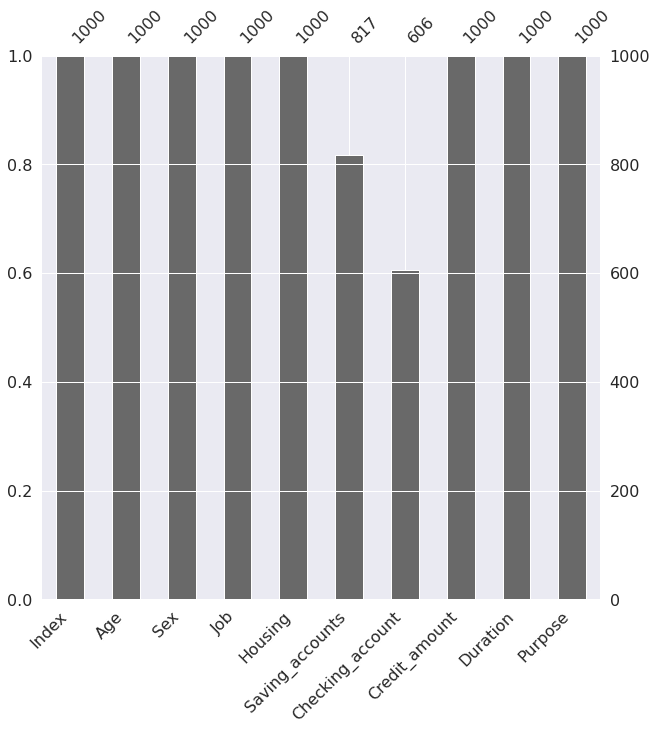

In [214]:
import missingno as msno #imports missingno
msno.bar(df, figsize=(10, 10)) #Creating barplot to see missing values

From above plot we can visualize the missing values of Saving_accounts	Checking_account columns

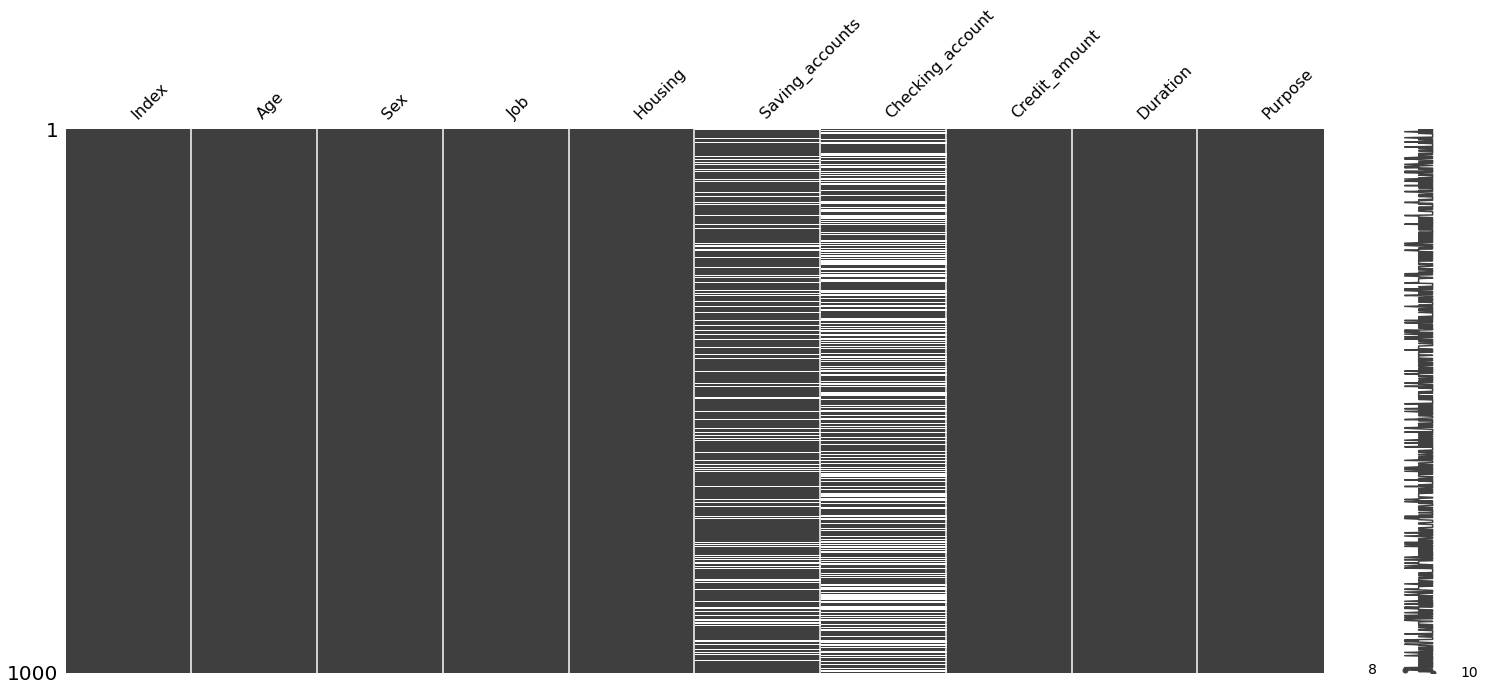

In [ ]:
msno.matrix(df) # creating matrix plot to see the pattern of missing values

From above plot we can see the missing values which are having blank space. More the spart lines, more missing values.

In [ ]:
df['Saving_accounts'].fillna(df['Saving_accounts'].mode()[0], inplace=True) #Filling the missing values of Saving_accounts column with it's mode

In [ ]:
df['Checking_account'].fillna(df['Checking_account'].mode()[0], inplace=True) #Filling the missing values of Checking_account column with it's mode

In [ ]:
df.isna().sum() #Finds the number of missing values

Index               0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving_accounts     0
Checking_account    0
Credit_amount       0
Duration            0
Purpose             0
dtype: int64

From above output there are no missing values.

In [ ]:
df.info() #Gives information about df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Index             1000 non-null   int64   
 1   Age               1000 non-null   int64   
 2   Sex               1000 non-null   object  
 3   Job               1000 non-null   category
 4   Housing           1000 non-null   object  
 5   Saving_accounts   1000 non-null   object  
 6   Checking_account  1000 non-null   object  
 7   Credit_amount     1000 non-null   int64   
 8   Duration          1000 non-null   int64   
 9   Purpose           1000 non-null   object  
dtypes: category(1), int64(4), object(5)
memory usage: 71.6+ KB


From above output there are no missing values in df

In [ ]:
df.head() #Gives first 5 records

,Index,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
0,0,67,male,2,own,little,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,little,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


## Dealing with Outliers

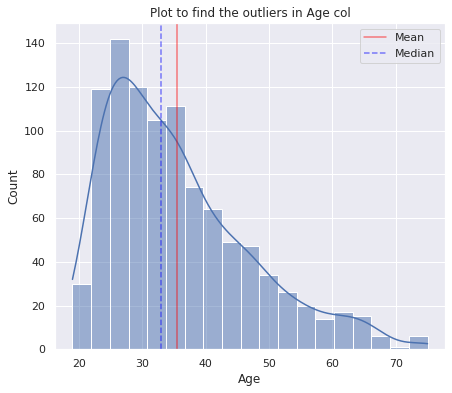

In [309]:
fig = plt.figure(figsize=(7,6)) #Adjusts the size of plot
#Histogram and density plot for Age
sns.histplot(data=df['Age'],kde=True) 
plt.axvline(x=df.Age.mean(),color='red',alpha=0.5,label='Mean') #Line to plot Mean
plt.axvline(x=df.Age.median(),color='blue',ls='--',alpha=0.5,label='Median') #Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the outliers in Age col') #Title of the plot
plt.show() #Displays the plot

Above plot shows distribution is right skewed and there are outliers.

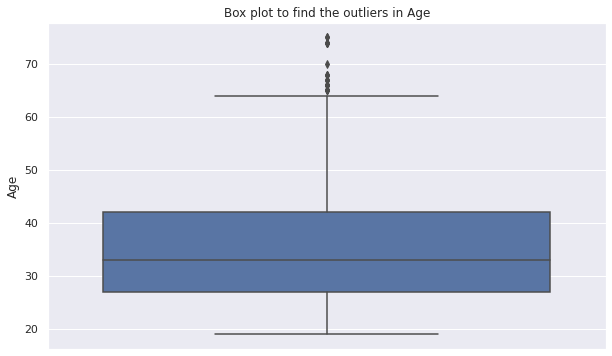

In [216]:
sns.boxplot(y=df['Age']) #Boxplot to find the outliers
plt.title("Box plot to find the outliers in Age")
plt.show() #Displays the plot

From above plot there are outliers above the upper whisker

In [310]:
from scipy import stats #Imports stats from scipy library
z=np.abs(stats.zscore(df['Age'])) #Finds Z score
print(z)

0      2.766456
1      1.191404
2      1.183312
3      0.831502
4      1.535122
         ...   
995    0.399832
996    0.391740
997    0.215835
998    1.103451
999    0.751642
Name: Age, Length: 1000, dtype: float64


In [311]:
threshold=3 
print(np.where(z>3)) #Finding the values above the upper threshold

(array([163, 186, 330, 430, 536, 606, 756]),)


From above output there are outliers in the mentioned index values

In [312]:
threshold=-3
print(np.where(z<-3)) #Finding the values below the lower threshold

(array([], dtype=int64),)


There are no outliers below the lower threshold

In [313]:
df_new=df.copy(deep=True) #Making a copy of df to preserve the original dataframe

In [314]:
df_new.head(2) #Gives first 2 records


,Index,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV


In [315]:
df_new['Age_median']=np.where(z>3,df['Age'].median(),df['Age']) #Replacing the outliers with median and create column Age_median

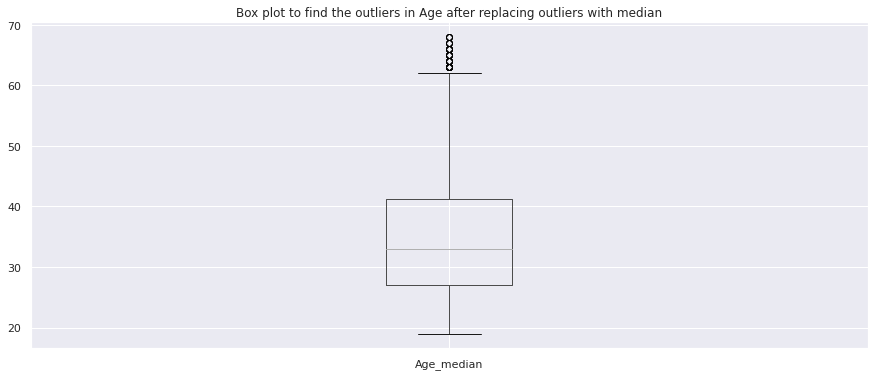

In [316]:
df_new.boxplot('Age_median')#Boxplot to find the outliers
plt.title("Box plot to find the outliers in Age after replacing outliers with median")
plt.show() #Displays the plot

From above plot outliers have been reduced.

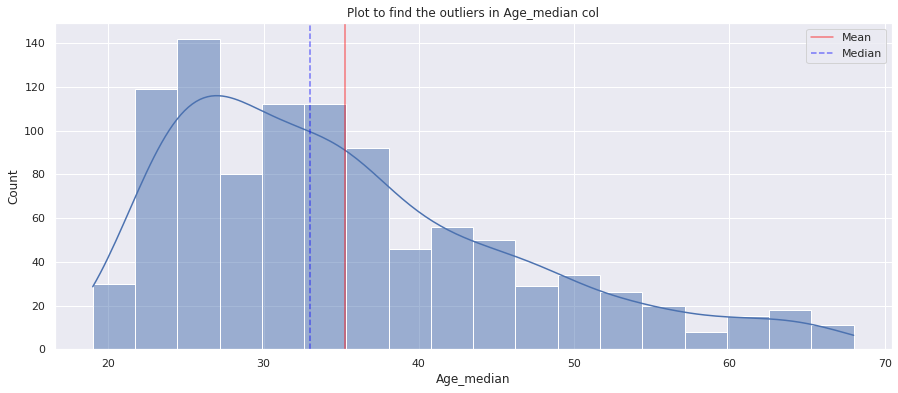

In [317]:
#Finding the frequency with the median replace age column
sns.histplot(data=df_new['Age_median'],kde=True) 
plt.axvline(x=df_new.Age_median.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_new.Age_median.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend()
plt.title('Plot to find the outliers in Age_median col') #Title of the plot
plt.show() #Displays the plot

From above plot we can find distribution of Age_median is better than Age

In [318]:
Q1=np.percentile(df_new['Age'],25,interpolation='midpoint') #First Quartile
Q2=np.percentile(df_new['Age'],50,interpolation='midpoint') #Second Quartile
Q3=np.percentile(df_new['Age'],75,interpolation='midpoint') #Third Quartile

In [319]:
IQR=Q3-Q1 #InterQuartile Range
print('Interquartile range is ',IQR)
low_lim = Q1 - 1.5*IQR  #lower limit 
up_lim = Q3 + 1.5*IQR   #upper limit
print('low_limit is ',low_lim)
print('up_limit is ',up_lim)
outlier=[] #outlier list
for x in df_new['Age']: #iterates through Age column
  if ((x>up_lim) or (x<low_lim)): #checks if value is outside the limits
    outlier.append(x)  #appends the value to outlier
print('outlier in the age column is ',outlier)

Interquartile range is  15.0
low_limit is  4.5
up_limit is  64.5
outlier in the age column is  [67, 66, 66, 70, 65, 74, 68, 66, 75, 74, 65, 75, 67, 74, 65, 66, 74, 66, 67, 65, 68, 65, 68]


In [320]:
df_new['Age_iqr']=np.where(df_new['Age']>up_lim,up_lim,df_new['Age']) #Replace the outliers with upper limit 

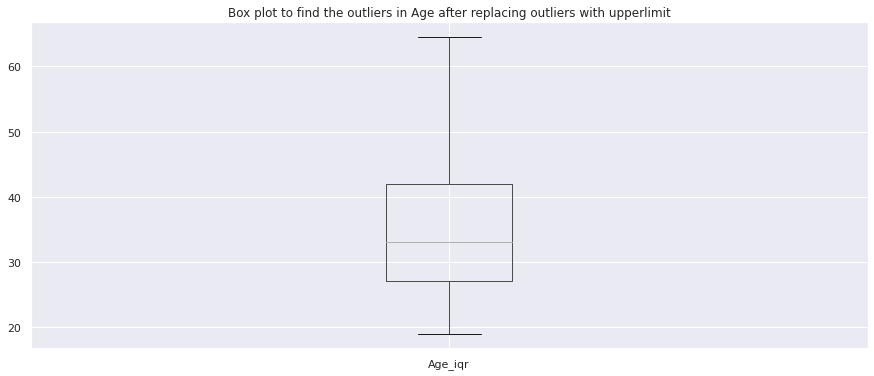

In [321]:
df_new.boxplot('Age_iqr')#Boxplot to find the outliers
plt.title("Box plot to find the outliers in Age after replacing outliers with upperlimit")
plt.show() #Displays the plot

From above plot there are no outliers after replacing them with upper limit

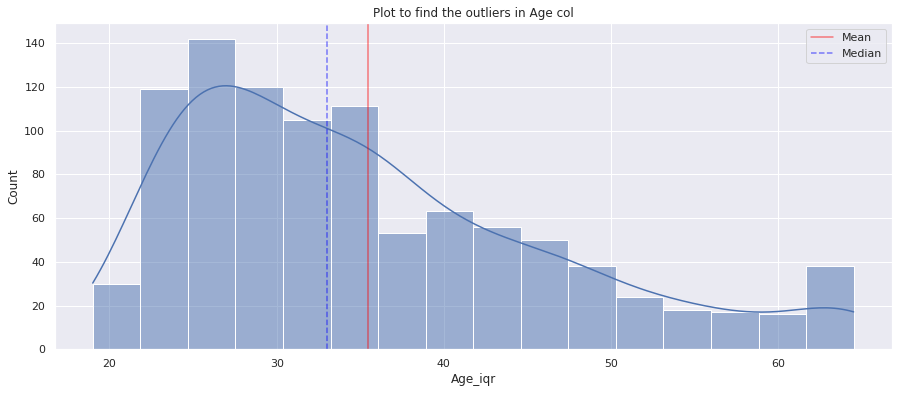

In [322]:
#Finding the frequency distribution of age_iqr column
sns.histplot(data=df_new['Age_iqr'],kde=True) 
plt.axvline(x=df_new.Age_iqr.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_new.Age_iqr.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the outliers in Age col') #Title of the plot
plt.show() #Displays the plot

Above plot seems better than the before plot which has been replaced with median

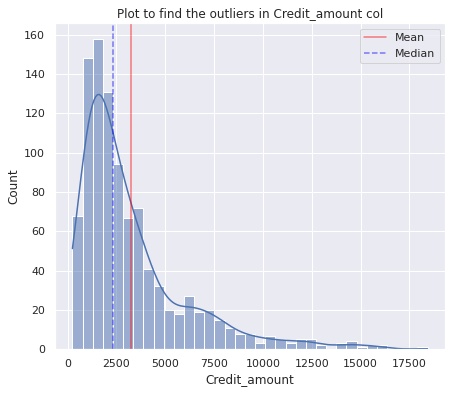

In [323]:
fig = plt.figure(figsize=(7,6)) #Adjusts the size of plot
#Histogram and density plot for Credit_amount column
sns.histplot(data=df_new['Credit_amount'],kde=True) 
plt.axvline(x=df_new.Credit_amount.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_new.Credit_amount.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the outliers in Credit_amount col') #Title of the plot
plt.show() #Displays the plot

Above plot shows that there are outliers in Credit_amount

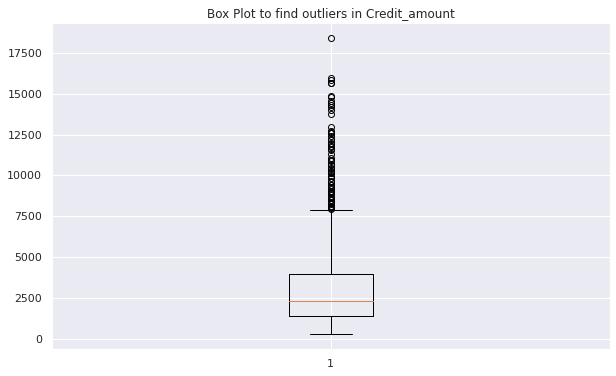

In [227]:
plt.boxplot(df_new["Credit_amount"]) #Box plot to find outliers
plt.title("Box Plot to find outliers in Credit_amount") #Title
plt.grid(True)
plt.show()

In [324]:
z=np.abs(stats.zscore(df_new['Credit_amount']))  #z score of Credit_amount
print(z)

0      0.745131
1      0.949817
2      0.416562
3      1.634247
4      0.566664
         ...   
995    0.544162
996    0.207612
997    0.874503
998    0.505528
999    0.462457
Name: Credit_amount, Length: 1000, dtype: float64


In [325]:
threshold=3
print(np.where(z>3)) #upper threshold

(array([ 18,  63,  87,  95, 105, 236, 272, 274, 373, 374, 378, 381, 395,
       563, 615, 637, 714, 744, 763, 818, 832, 887, 915, 917, 921]),)


Above indices are having outliers greater than upper threshold

In [326]:
threshold=-3
print(np.where(z<-3)) #lower threshold

(array([], dtype=int64),)


There are no outliers below the lower threshold

In [327]:
#Replace outlier values with median 
df_new['Credit_amount_median']=np.where(z>3,df_new['Credit_amount'].median(),df_new['Credit_amount']) 

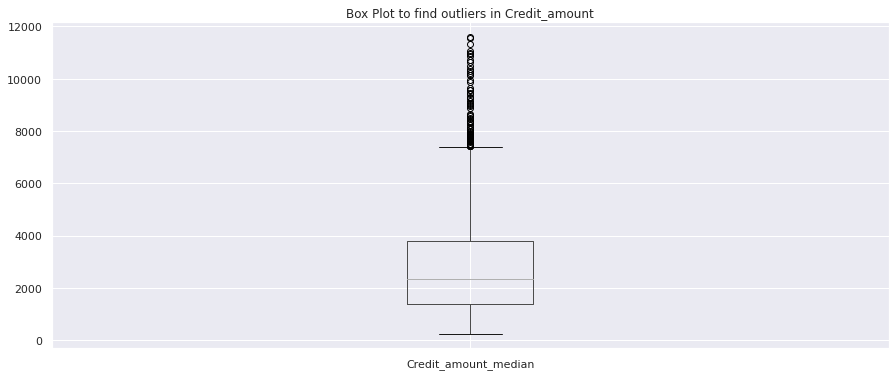

In [328]:
df_new.boxplot('Credit_amount_median')#Box plot to find outliers of Credit_amount_median
plt.title("Box Plot to find outliers in Credit_amount") #Title
plt.show()

Above plot still shows outliers after replacing with median

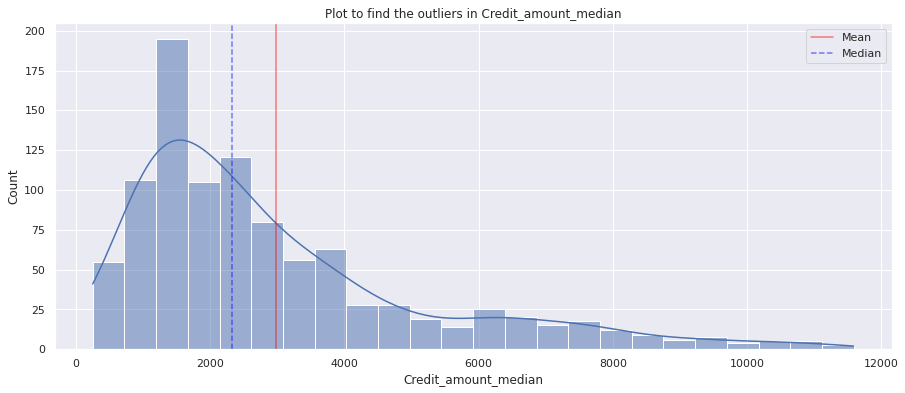

In [329]:
#Finding the frequency of Credit_amount_median
sns.histplot(data=df_new['Credit_amount_median'],kde=True) 
plt.axvline(x=df_new.Credit_amount_median.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_new.Credit_amount_median.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the outliers in Credit_amount_median') #Title of the plot
plt.show() #Displays the plot

Above plot shows that Credit_amount_median still has outliers

In [330]:
Q1=np.percentile(df_new['Credit_amount'],25,interpolation='midpoint') #First Quartile
Q2=np.percentile(df_new['Credit_amount'],50,interpolation='midpoint') #Second Quartile
Q3=np.percentile(df_new['Credit_amount'],75,interpolation='midpoint') #Third Quartile

In [331]:
IQR=Q3-Q1 #InterQuartile Range
print('Interquartile range is ',IQR)
low_lim = Q1 - 1.5*IQR #lower limit 
up_lim = Q3 + 1.5*IQR #upper limit 
print('low_limit is ',low_lim)
print('up_limit is ',up_lim)
outlier=[] #outlier list
for x in df_new['Credit_amount']: #iterates through Age column
  if ((x>up_lim) or (x<low_lim)): #checks if value is outside the limits
    outlier.append(x) #appends the value to outlier
print('outlier in the age column is ',outlier)

Interquartile range is  2607.5
low_limit is  -2546.25
up_limit is  7883.75
outlier in the age column is  [9055, 8072, 12579, 9566, 14421, 8133, 9436, 12612, 15945, 11938, 8487, 10144, 8613, 9572, 10623, 10961, 14555, 8978, 12169, 11998, 10722, 9398, 9960, 10127, 11590, 13756, 14782, 14318, 12976, 11760, 8648, 8471, 11328, 11054, 8318, 9034, 8588, 7966, 8858, 12389, 12204, 9157, 15653, 7980, 8086, 10222, 10366, 9857, 14027, 11560, 14179, 12680, 8065, 9271, 9283, 9629, 15857, 8335, 11816, 10875, 9277, 15672, 8947, 10477, 18424, 14896, 12749, 10297, 8358, 10974, 8386, 8229]


In [332]:
#Outliers of Credit_amount replaced with upper limit
df_new['Credit_amount_iqr']=np.where(df_new['Credit_amount']>up_lim,up_lim,df_new['Credit_amount']) 

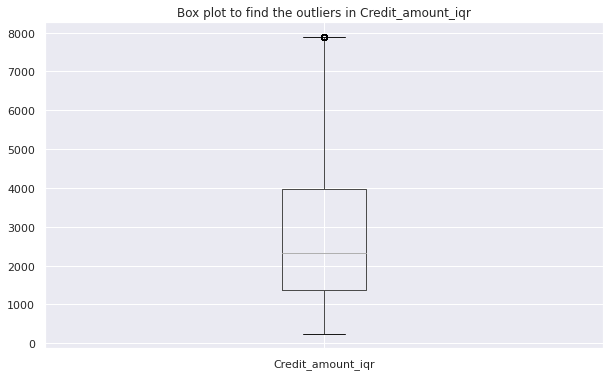

In [237]:
df_new.boxplot('Credit_amount_iqr')#Boxplot to find the outliers
plt.title("Box plot to find the outliers in Credit_amount_iqr")
plt.show() #Displays the plot


Above plot shows that the outliers are treated 

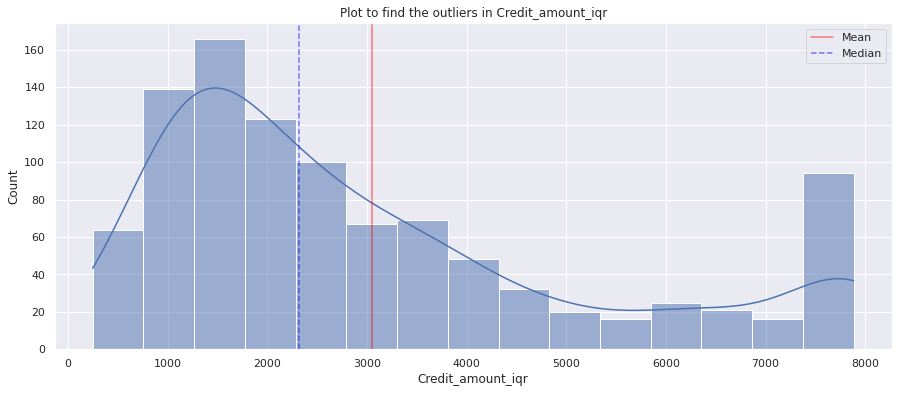

In [333]:
#frequency distribution of  Credit_amount_iqr
sns.histplot(data=df_new['Credit_amount_iqr'],kde=True) 
plt.axvline(x=df_new.Credit_amount_iqr.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_new.Credit_amount_iqr.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the outliers in Credit_amount_iqr') #Title of the plot
plt.show() #Displays the plot

Above plot looks better as the outliers are treated

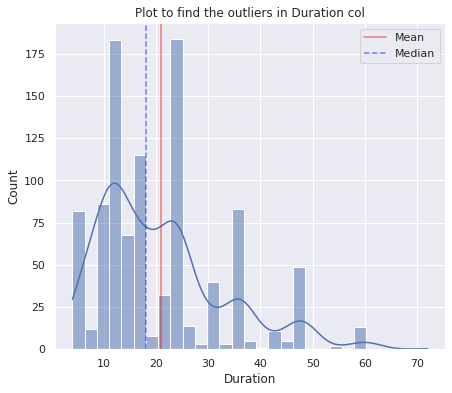

In [307]:
fig = plt.figure(figsize=(7,6)) #Adjusts the size of plot
#Histogram and density plot for Duration
sns.histplot(data=df_new['Duration'],kde=True) 
plt.axvline(x=df_new.Duration.mean(),color='red',alpha=0.5,label='Mean')  #Line to plot Mean
plt.axvline(x=df_new.Duration.median(),color='blue',ls='--',alpha=0.5,label='Median') #Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the outliers in Duration col') #Title of the plot
plt.show() #Displays the plot

Above plot shows that there are outliers in Duration column

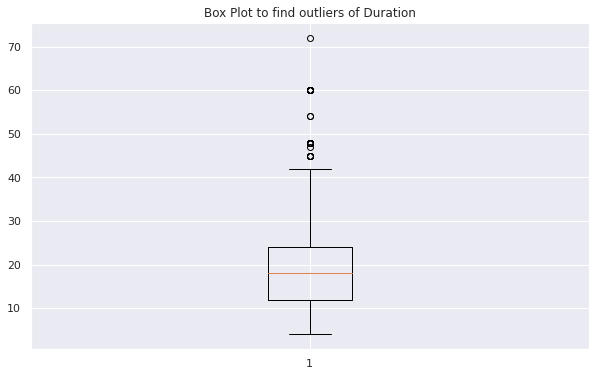

In [241]:
plt.boxplot(df_new["Duration"])  #Boxplot to find the outliers
plt.title("Box Plot to find outliers of Duration") #Title of the plot
plt.show() #Displays the plot

Above boxplot shows there are outliers above the upper whisker

In [242]:
z=np.abs(stats.zscore(df_new['Duration'])) #Z Score of Duration 
print(z)

0      1.236478
1      2.248194
2      0.738668
3      1.750384
4      0.256953
         ...   
995    0.738668
996    0.754763
997    0.738668
998    1.999289
999    1.999289
Name: Duration, Length: 1000, dtype: float64


In [243]:
threshold=3
print(np.where(z>3)) #upper threshold

(array([ 29, 134, 255, 332, 373, 374, 616, 637, 672, 677, 685, 714, 938,
       973]),)


Above output shows there are outliers

In [244]:
threshold=-3
print(np.where(z<-3)) #lower threshold

(array([], dtype=int64),)


No outliers below the lower threshold

In [245]:
df_new['Duration_median']=np.where(z>3,df_new['Duration'].median(),df_new['Duration']) #Replace outlier with median

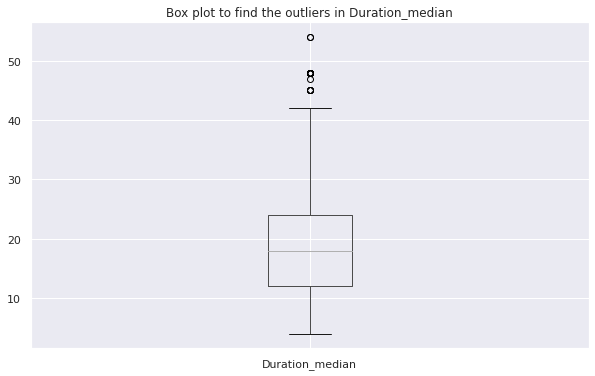

In [246]:
df_new.boxplot('Duration_median')#Boxplot to find the outliers 
plt.title("Box plot to find the outliers in Duration_median") #Title
plt.show() #Displays the plot


Above plot shows the outliers have been reduced

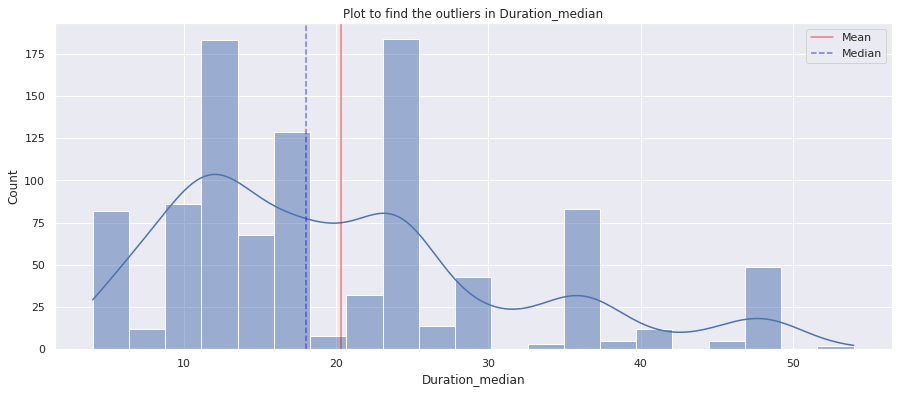

In [306]:
#Finding the frequency distribution of Duration_median
sns.histplot(data=df_new['Duration_median'],kde=True) 
plt.axvline(x=df_new.Duration_median.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_new.Duration_median.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the outliers in Duration_median') #Title of the plot
plt.show() #Displays the plot

Above plot shows the outliers are reduced as the distribution is looking better

In [248]:
Q1=np.percentile(df_new['Duration'],25,interpolation='midpoint') #First Quartile
Q2=np.percentile(df_new['Duration'],50,interpolation='midpoint') #Second Quartile
Q3=np.percentile(df_new['Duration'],75,interpolation='midpoint') #Third Quartile

In [249]:
IQR=Q3-Q1 #InterQuartile Range
print('Interquartile range is ',IQR)
low_lim = Q1 - 1.5*IQR #upper limit 
up_lim = Q3 + 1.5*IQR #lower limit 
print('low_limit is ',low_lim)
print('up_limit is ',up_lim)
outlier=[] #outlier list
for x in df_new['Duration']: #iterates through Duration column
  if ((x>up_lim) or (x<low_lim)): #checks if value is outside the limits
    outlier.append(x) #appends the value to outlier
print('outlier in the age column is ',outlier)

Interquartile range is  12.0
low_limit is  -6.0
up_limit is  42.0
outlier in the age column is  [48, 48, 60, 45, 48, 48, 48, 54, 54, 48, 48, 60, 48, 48, 45, 48, 48, 60, 48, 48, 47, 48, 48, 48, 48, 48, 48, 60, 48, 60, 60, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 60, 48, 60, 48, 48, 48, 60, 72, 60, 48, 48, 60, 48, 48, 48, 48, 48, 48, 45, 48, 48, 48, 48, 60, 48, 60, 48, 45, 45]


In [250]:
#Replace outliers with the upper limit
df_new['Duration_iqr']=np.where(df_new['Duration']>up_lim,up_lim,df_new['Duration'])

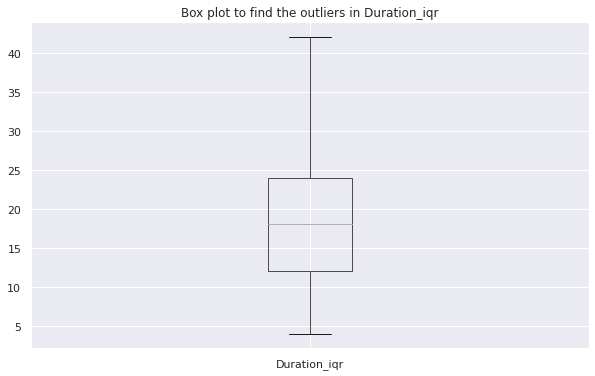

In [252]:
df_new.boxplot('Duration_iqr') #Boxplot to find the outliers
plt.title("Box plot to find the outliers in Duration_iqr")
plt.show() #Displays the plot


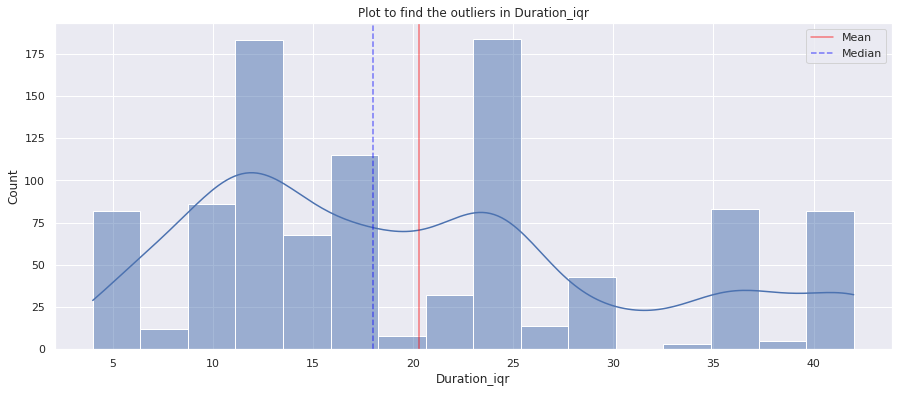

In [305]:
# Frequency distribution of Duration_iqr
sns.histplot(data=df_new['Duration_iqr'],kde=True) 
plt.axvline(x=df_new.Duration_iqr.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_new.Duration_iqr.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the outliers in Duration_iqr') #Title of the plot
plt.show() #Displays the plot

## Skewness

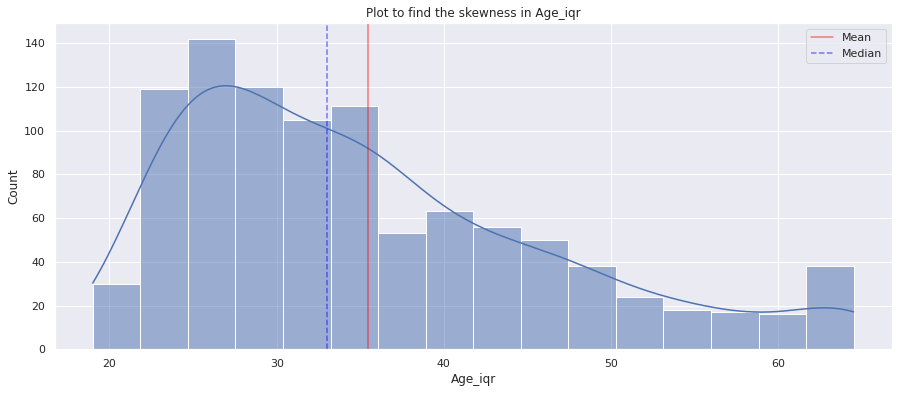

In [304]:
#Finding the frequency distribution of age_iqr column
sns.histplot(data=df_new['Age_iqr'],kde=True) 
plt.axvline(x=df_new.Age_iqr.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_new.Age_iqr.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the skewness in Age_iqr') #Title of the plot
plt.show() #Displays the plot

Above plot shows Age_iqr is right skewed

In [255]:
df_new['Age_log']=np.log(df_new['Age_iqr']) #Log transformation of Age_iqr

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


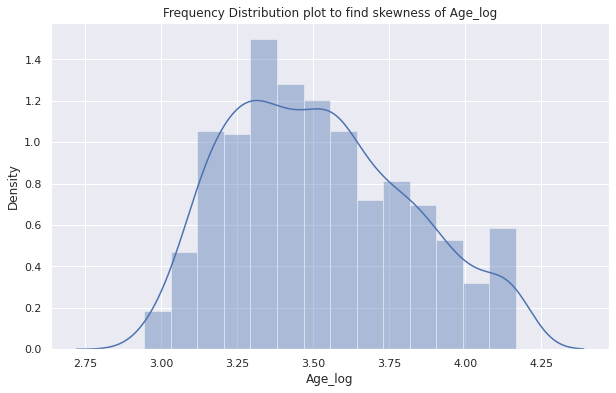

In [257]:
sns.distplot(df_new['Age_log']) #Distribution plot to find skewness of Age_log
plt.title("Frequency Distribution plot to find skewness of Age_log")
plt.show() #Displays the plot


Above plot shows the plot has been transformed well and there is almost normal distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


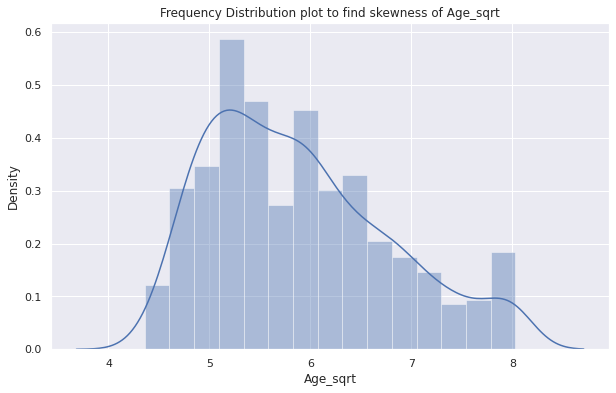

In [258]:
df_new['Age_sqrt']=np.sqrt(df_new['Age_iqr']) #Squareroot transformation
sns.distplot(df_new['Age_sqrt']) #Distribution plot to find skewness of Age_sqrt
plt.title("Frequency Distribution plot to find skewness of Age_sqrt")
plt.show() #Displays the plot

Above plot shows the transformed plot but log transformation reduced the skewness of Age column better

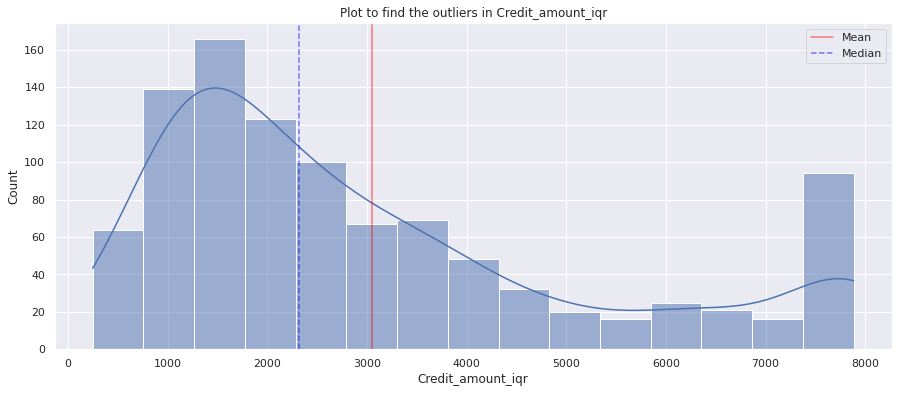

In [303]:
#frequency distribution of  Credit_amount_iqr
sns.histplot(data=df_new['Credit_amount_iqr'],kde=True) 
plt.axvline(x=df_new.Credit_amount_iqr.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_new.Credit_amount_iqr.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the outliers in Credit_amount_iqr') #Title of the plot
plt.show() #Displays the plot

Above plot shows Credit_amount_iqr is right skewed

In [261]:
df_new['Credit_amount_log']=np.log(df_new['Credit_amount_iqr']) #Log transformation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


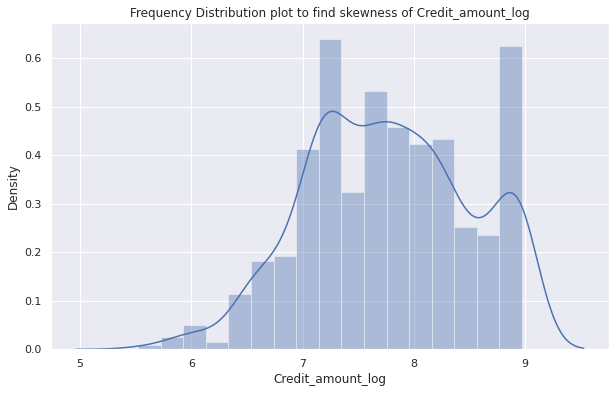

In [262]:
sns.distplot(df_new['Credit_amount_log']) #Distribution plot to find skewness of Credit_amount_log
plt.title("Frequency Distribution plot to find skewness of Credit_amount_log")
plt.show() #Displays the plot

Above plot shows Credit_amount has been transformed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


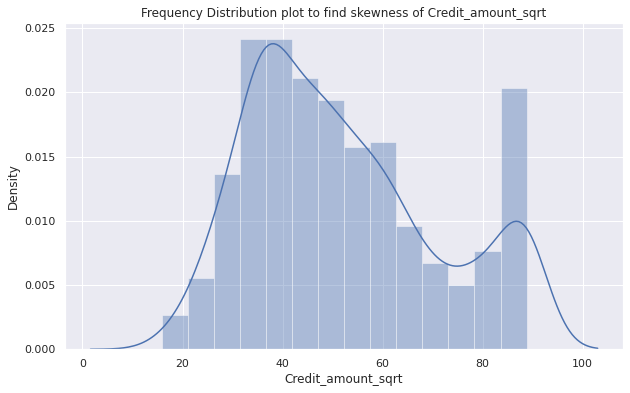

In [263]:
df_new['Credit_amount_sqrt']=np.sqrt(df_new['Credit_amount_iqr']) #Squareroot transformation
sns.distplot(df_new['Credit_amount_sqrt']) #Distribution plot to find skewness of Credit_amount_sqrt
plt.title("Frequency Distribution plot to find skewness of Credit_amount_sqrt")
plt.show() #Displays the plot

Above plot shows the squareroot transformation 

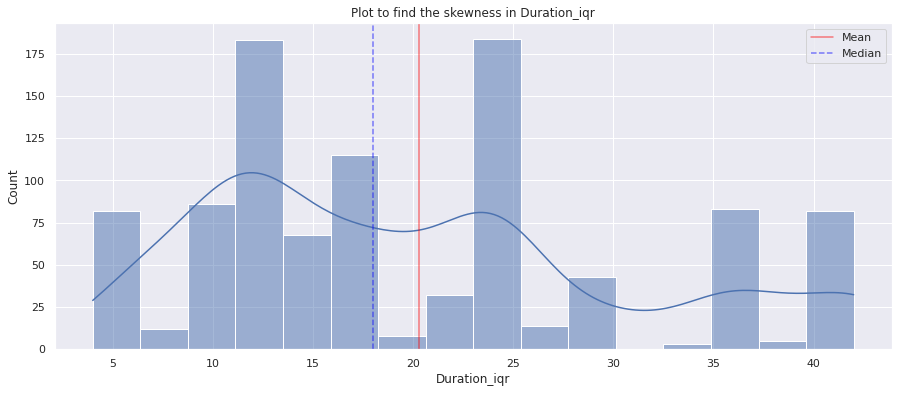

In [302]:
# Frequency distribution of Duration_iqr
sns.histplot(data=df_new['Duration_iqr'],kde=True) 
plt.axvline(x=df_new.Duration_iqr.mean(),color='red',alpha=0.5,label='Mean') # Line to plot Mean
plt.axvline(x=df_new.Duration_iqr.median(),color='blue',ls='--',alpha=0.5,label='Median') # Line to plot Median
plt.legend() #Legend
plt.title('Plot to find the skewness in Duration_iqr') #Title of the plot
plt.show() #Displays the plot

Above plot shows the skewness of Duration_iqr

In [265]:
df_new['Duration_log']=np.log(df_new['Duration_iqr']) #Log transformation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


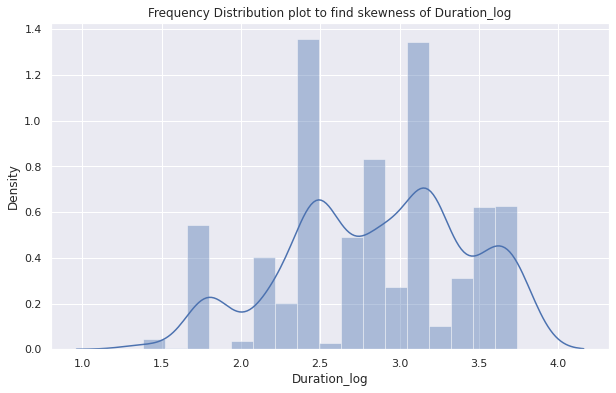

In [266]:
sns.distplot(df_new['Duration_log'])#Distribution plot to find skewness of Duration_log
plt.title("Frequency Distribution plot to find skewness of Duration_log")
plt.show() #Displays the plot


Above plot shows the log transformed Duration

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


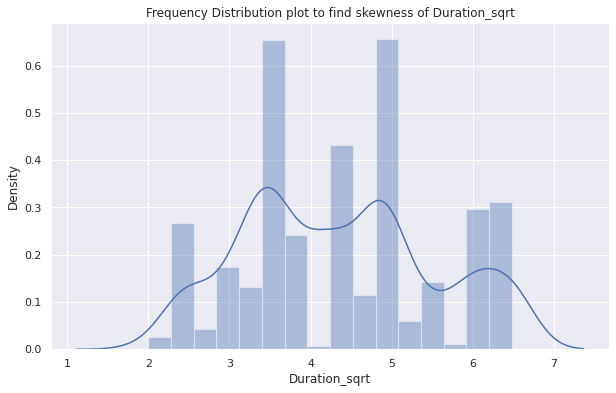

In [267]:
df_new['Duration_sqrt']=np.sqrt(df_new['Duration_iqr']) #Squareroot transformation
sns.distplot(df_new['Duration_sqrt']) #Distribution plot to find skewness of Duration_sqrt
plt.title("Frequency Distribution plot to find skewness of Duration_sqrt")
plt.show() #Displays the plot

Above plot shows frequency distribution of squareroot transformed Duration

## Exploratory Data Analysis

**Univariate Analysis**

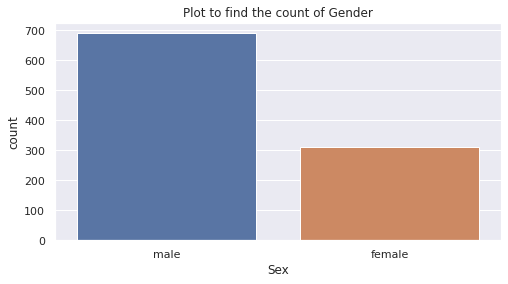

In [270]:
fig = plt.figure(figsize=(8,4))
sns.countplot(x='Sex', data=df_new) # Countplot 
plt.title("Plot to find the count of Gender") #Title of the plot
plt.show()  #Displays the plot

From above plot we can see that there are more male people compared to female.

In [ ]:
df_new.Sex.value_counts() #Returns counts of unique values

male      690
female    310
Name: Sex, dtype: int64

From above output there are 690 male and 310 female people

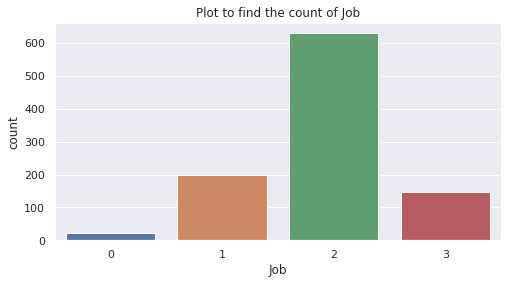

In [272]:
fig = plt.figure(figsize=(8,4))
sns.countplot(x='Job', data=df_new) # Countplot 
plt.title("Plot to find the count of Job") #Title of the plot
plt.show() 

From above plot we can see that number of skilled employees are more compared to others.

In [ ]:
df_new.Job.value_counts() #Returns counts of unique values

2    630
1    200
3    148
0     22
Name: Job, dtype: int64

Above output shows there are 

22 unskilled and non-resident

200 unskilled and resident

630 skilled and 

148 highly skilled

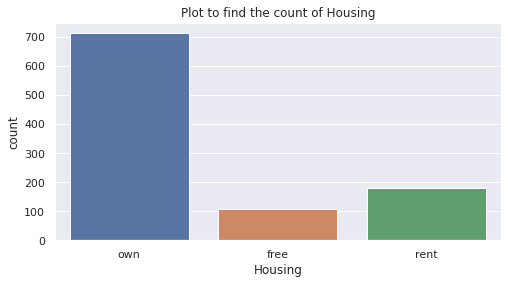

In [273]:
fig = plt.figure(figsize=(8,4))
sns.countplot(x='Housing', data=df_new) # Countplot 
plt.title("Plot to find the count of Housing") #Title of the plot
plt.show() 

Above plot shows there are more own houses followed by rented and free.

In [ ]:
df_new.Housing.value_counts() #Returns counts of unique values

own     713
rent    179
free    108
Name: Housing, dtype: int64

From above output there are 713 own, 179 rented and 108 free housing types

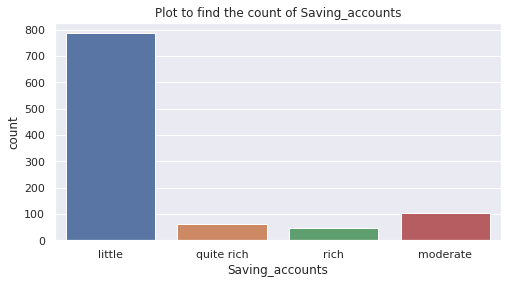

In [275]:
fig = plt.figure(figsize=(8,4)) #Size of the plot
sns.countplot(x='Saving_accounts', data=df_new) # Countplot 
plt.title("Plot to find the count of Saving_accounts") #Title of the plot
plt.show() #Displays the plot

From above graph we can find that count of saving_accounts with little value are more followed by moderate. This is obvious because their population is more compared to rich and quite rich.

In [ ]:
df_new.Saving_accounts.value_counts() #Returns counts of unique values

little        786
moderate      103
quite rich     63
rich           48
Name: Saving_accounts, dtype: int64

From above output count of little saving_accounts is 786, moderate is 103, quite rich is 63 and rich is 48.

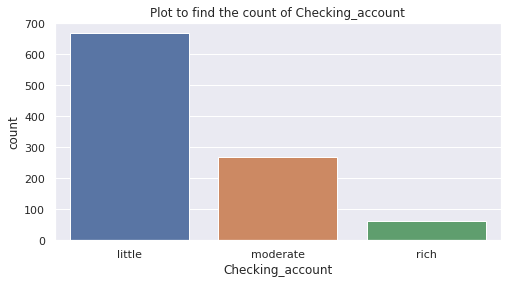

In [276]:
fig = plt.figure(figsize=(8,4)) #Size of the plot
sns.countplot(x='Checking_account', data=df_new) # Countplot 
plt.title("Plot to find the count of Checking_account") #Title of the plot
plt.show() #Displays the plot

In [ ]:
df_new.Checking_account.value_counts() #Returns counts of unique values

little      668
moderate    269
rich         63
Name: Checking_account, dtype: int64

From above output there 668 little, 269 moderate and 63 rich checking_accounts

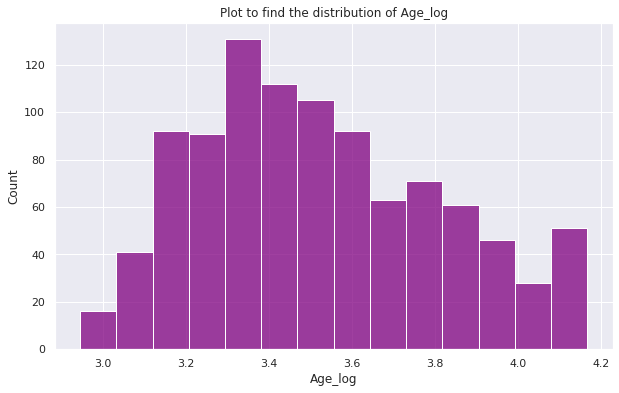

In [277]:
sns.histplot(data=df_new, x="Age_log", color="purple")# Histogram
plt.title("Plot to find the distribution of Age_log") #Title of the plot
plt.show() #Displays the plot

From above plot we can see the frequency distribution of Age_log

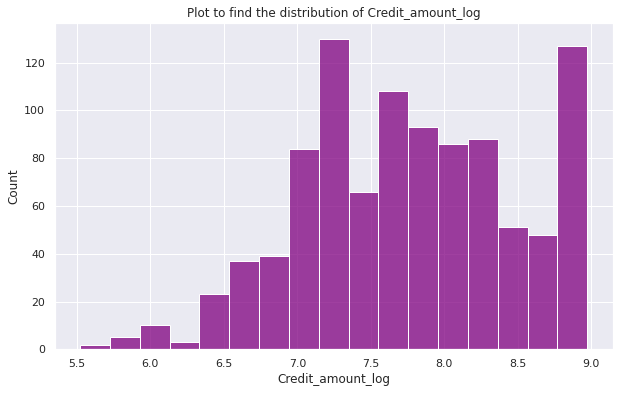

In [278]:
sns.histplot(data=df_new, x="Credit_amount_log", color="purple")# Histogram
plt.title("Plot to find the distribution of Credit_amount_log") #Title of the plot
plt.show() #Displays the plot

From above plot we can see the distribution of Credit_amount_log

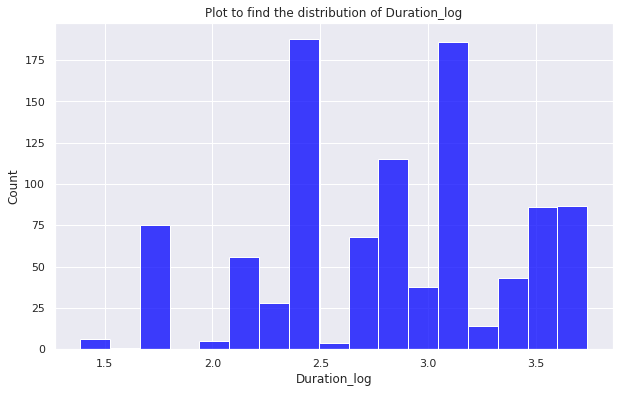

In [279]:
sns.histplot(data=df_new, x="Duration_log", color="blue") # Histogram
plt.title("Plot to find the distribution of Duration_log") #Title of the plot
plt.show() #Displays the plot

From above plot we can see the distribution of Duration_log

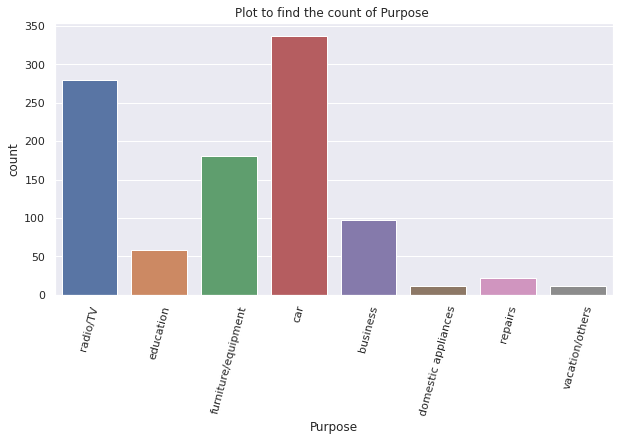

In [280]:
plt.figure(figsize=(10,5)) #Size of the plot
ax=sns.countplot(x='Purpose', data=df_new) #Countplot
plt.title("Plot to find the count of Purpose ")
plt.xticks(rotation=75) #Rotates the xlabels
plt.show() #Displays the plot

From above plot number of customers taking loan for car are more, followed by radio/tv and others.

In [ ]:
df_new.Purpose.value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64

Above output gives the unique counts of Purpose 

**Bivariate Analysis**

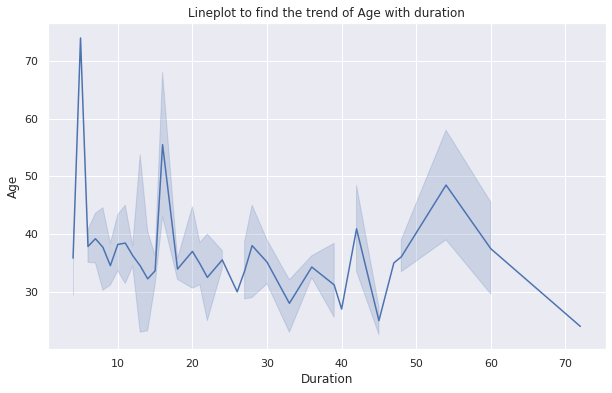

In [281]:
sns.lineplot( x = "Duration",y = "Age",data = df_new); #Lineplot to find the trend of Age with duration
plt.title("Lineplot to find the trend of Age with duration") #Title
plt.show() #Displays the plot

From above plot as age increases the credit worthiness of the customer decreases. Thus the duration should decrease to have good credit worthiness.

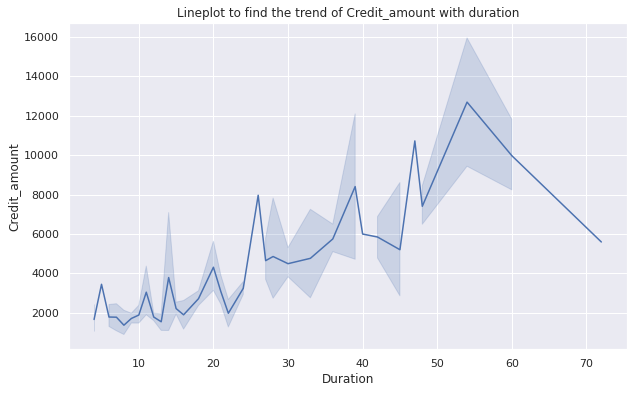

In [282]:
sns.lineplot( x = "Duration",y = "Credit_amount",data = df_new)#Lineplot to find the trend of Credit_amount with duration
plt.title("Lineplot to find the trend of Credit_amount with duration") #Title
plt.show() #Displays the plot

From above plot we can see that as the credit amount increases, the duration of repayment will be substantial.

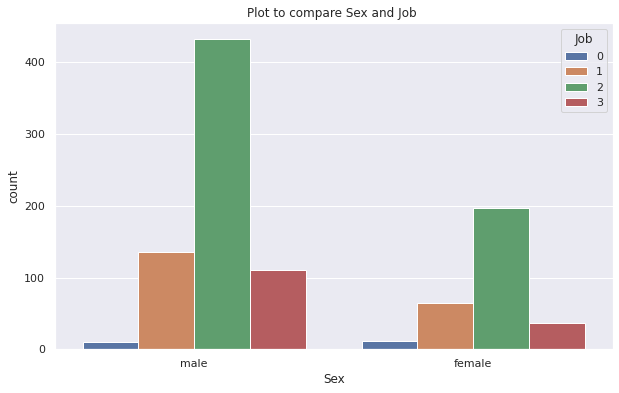

In [283]:
sns.countplot(x='Sex', hue='Job', data=df_new) #Countplot
plt.title("Plot to compare Sex and Job ") #Title
plt.show() #Displays the plot 

The credit worthiness of skilled employees from both genders is higher compared to employees of other job categories

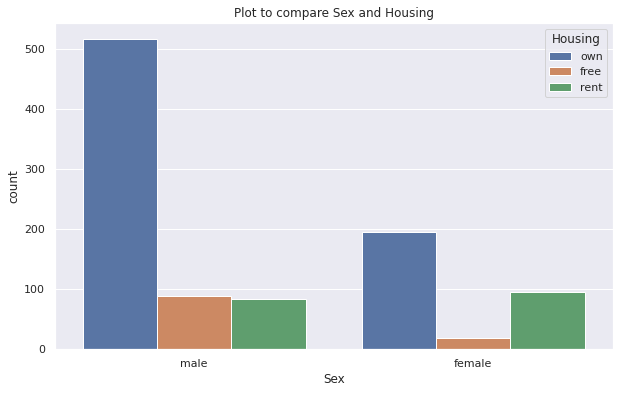

In [284]:
sns.countplot(x='Sex', hue='Housing', data=df_new)  #Countplot
plt.title('Plot to compare Sex and Housing') #Title
plt.show() #Displays the plot

The credit worthiness of both genders having own house is higher compared to others who are having a free or rented accomodation.

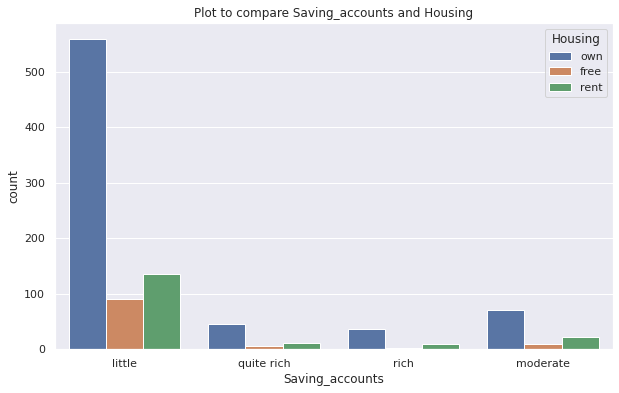

In [289]:
sns.countplot(x='Saving_accounts', hue='Housing', data=df_new) #Countplot
plt.title('Plot to compare Saving_accounts and Housing') #Title
plt.show() #Displays the plot

The credit worthiness of people with own house and less saving_accounts is more as the population of people being rich and quite rich is very less compared to moderate and little.

**Multivariate Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 96.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 80.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 81.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 89.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 47.4% of the points cannot be placed; y

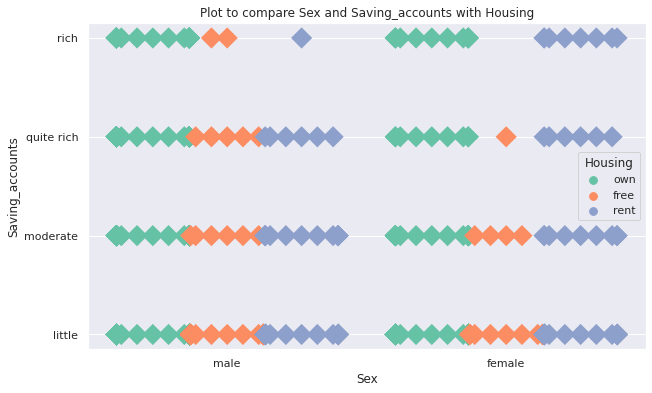

In [286]:
#Swarmplot to compare 3 categories ie, Sex and Saving_accounts with Housing
sns.swarmplot(x="Sex", y="Saving_accounts", hue="Housing", data=df_new, palette="Set2",size=15, marker="D", dodge=True)
plt.title('Plot to compare Sex and Saving_accounts with Housing')
plt.show() #Displays the plot


Both genders male and female are having more little savings but are also having own house. Their credit worthiness is more.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 93.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 85.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


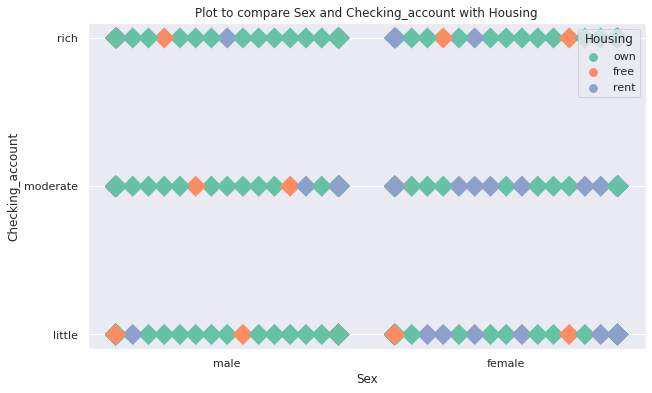

In [285]:
#Swarmplot to compare 3 categories ie, Sex and Checking_account with Housing
sns.swarmplot(x="Sex", y="Checking_account", hue="Housing", data=df_new, palette="Set2",size=15, marker="D")
plt.title('Plot to compare Sex and Checking_account with Housing')
plt.show() #Displays the plot

Male people are having more little savings but are also having own house. Their credit worthiness is more compared to females.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 84.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 71.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


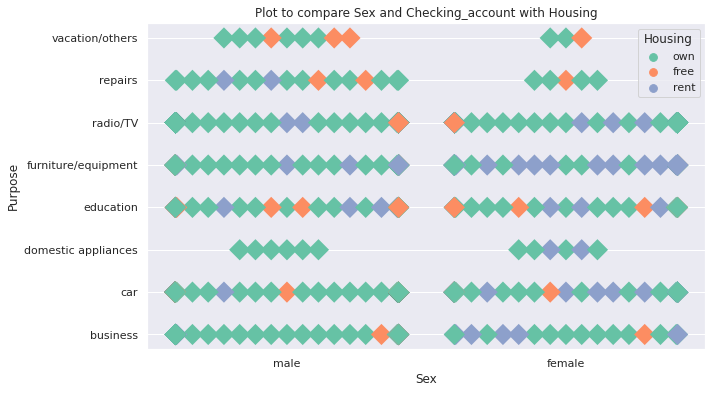

In [288]:
sns.swarmplot(x="Sex", y="Purpose", hue="Housing", data=df_new, palette="Set2",size=15, marker="D")
plt.title('Plot to compare Sex and Checking_account with Housing')
plt.show() #Displays the plot

People who have own house have good credit worthiness  as they have an asset which can be used to repay the debt which was taken for different purposes.

In [291]:
df_final=df.drop('Index',axis=1) #Drop index column and assign to df_final 

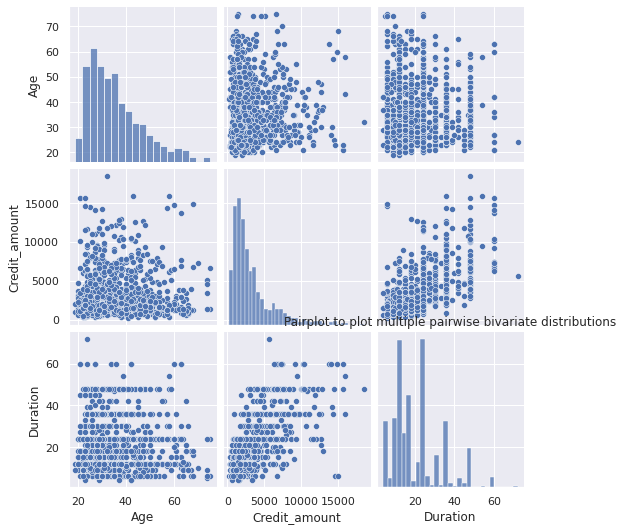

In [294]:
sns.pairplot(df_final) #To plot multiple pairwise bivariate distributions in a dataset
plt.title('Pairplot to plot multiple pairwise bivariate distributions')
plt.show()

From above plot we can find the pairwise relationship between different variables in the dataset.

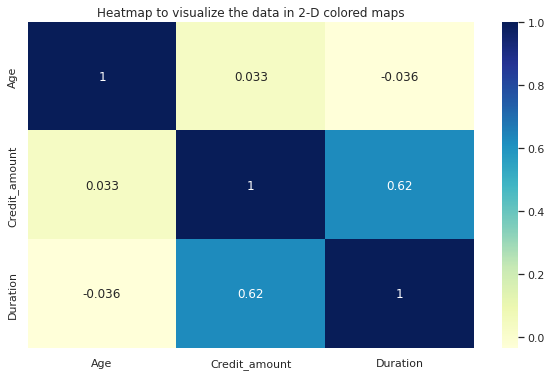

In [295]:
sns.heatmap(df_final.corr(), cmap="YlGnBu", annot=True) #visualize the data in 2-D colored maps making use of color variations
plt.title('Heatmap to visualize the data in 2-D colored maps') #Title
plt.show() #Displays the plot

Above plot shows good correlation between credit_amount and duration.  As credit amount increases, the duration of repayment will be substantial.

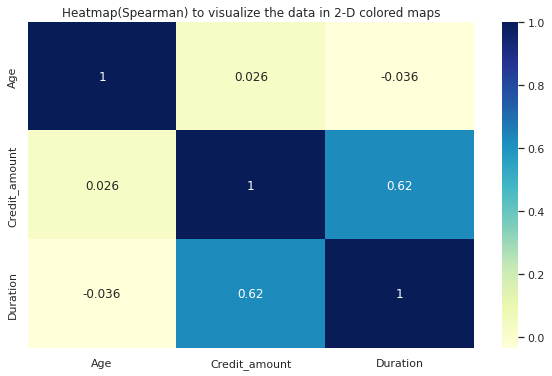

In [296]:
sns.heatmap(df_final.corr(method = "spearman"), cmap="YlGnBu", annot=True) #visualize the data in 2-D colored maps making use of color variations
plt.title('Heatmap(Spearman) to visualize the data in 2-D colored maps') #Title 
plt.show() #Displays the plot

Above plot shows good correlation between credit_amount and duration. As credit amount increases, the duration of repayment will be substantial.

### 4.	How many highly skilled men (below 35 years) are staying in their own house?

In [ ]:
df_lessthan35=df_new[df_new['Age']<35] # Finds the Age values<35 and will be assigned to dataframe df_lessthan35

In [ ]:
df_lessthan35

,Index,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Age_median,Age_iqr,Credit_amount_median,Credit_amount_iqr,Duration_median,Duration_iqr,Duration_log,Durationt_sqrt,Duration_sqrt
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,22.0,22.0,5951.0,5951.0,48.0,42.0,3.737670,6.480741,6.480741
9,9,28,male,3,own,little,moderate,5234,30,car,28.0,28.0,5234.0,5234.0,30.0,30.0,3.401197,5.477226,5.477226
10,10,25,female,2,rent,little,moderate,1295,12,car,25.0,25.0,1295.0,1295.0,12.0,12.0,2.484907,3.464102,3.464102
11,11,24,female,2,rent,little,little,4308,48,business,24.0,24.0,4308.0,4308.0,48.0,42.0,3.737670,6.480741,6.480741
12,12,22,female,2,own,little,moderate,1567,12,radio/TV,22.0,22.0,1567.0,1567.0,12.0,12.0,2.484907,3.464102,3.464102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,992,23,male,1,rent,little,little,1936,18,radio/TV,23.0,23.0,1936.0,1936.0,18.0,18.0,2.890372,4.242641,4.242641
993,993,30,male,3,own,little,little,3959,36,furniture/equipment,30.0,30.0,3959.0,3959.0,36.0,36.0,3.583519,6.000000,6.000000
995,995,31,female,1,own,little,little,1736,12,furniture/equipment,31.0,31.0,1736.0,1736.0,12.0,12.0,2.484907,3.464102,3.464102
998,998,23,male,2,free,little,little,1845,45,radio/TV,23.0,23.0,1845.0,1845.0,45.0,42.0,3.737670,6.480741,6.480741


df_lessthan35 contains only the records which have age<35

In [ ]:
df_lessthan35.groupby('Job')['Housing'].value_counts() #group the rows by Job and returns a Series containing counts of unique values of Housing

Job  Housing
0    own          6
     rent         5
1    own         68
     rent        25
     free         3
2    own        274
     rent        89
     free        14
3    own         44
     rent        12
     free         8
Name: Housing, dtype: int64

 From above output it is clear that there are 44 highly skilled men (below 35 years) who are staying in their own house.

### 5.	Visualize men and females separately for their social status.

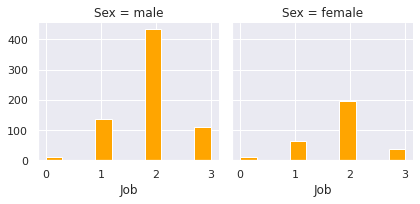

In [ ]:
sns.set(rc={"figure.figsize":(10, 6)}) #Figure size
graph = sns.FacetGrid(df_new, col ='Sex') # Form a facetgrid 
graph.map(plt.hist, 'Job', bins = 10, color ='orange') # map the above form facetgrid with attributes
# show the object
plt.show()

Above output shows that there are more skilled employees for both genders. Employment have implications for prestige and acceptance in society. Thus it is one of the factor of social status.

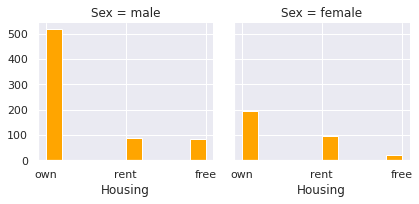

In [ ]:
sns.set(rc={"figure.figsize":(10, 6)}) #Figure size
graph = sns.FacetGrid(df_new, col ='Sex') # Form a facetgrid 
# map the above form facetgrid with attributes
graph.map(plt.hist, 'Housing', bins = 10, color ='orange')
# show the object
plt.show()

Above plot shows that there are more people in both genders who have own house.In society having own house is considered as a social status.

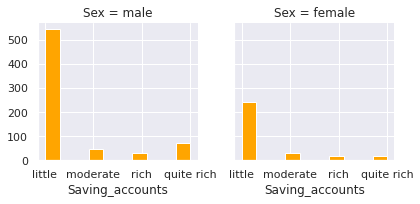

In [ ]:
sns.set(rc={"figure.figsize":(10, 6)}) #Figure size
graph = sns.FacetGrid(df_new, col ='Sex') # Form a facetgrid
# map the above form facetgrid with attributes
graph.map(plt.hist, 'Saving_accounts', bins = 10, color ='orange')
# show the object
plt.show()

Above plot shows that people of both genders with little saving accounts are more because their population ratio is more compared to rich and quite rich. Saving_accounts is a factor of social status.

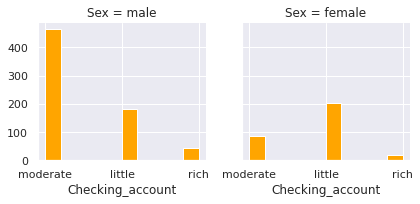

In [ ]:
sns.set(rc={"figure.figsize":(10, 6)}) #Figure size
graph = sns.FacetGrid(df_new, col ='Sex') # Form a facetgrid
# map the above form facetgrid with attributes
graph.map(plt.hist, 'Checking_account', bins = 10, color ='orange')
# show the object
plt.show()

From above plot we can see that male people with moderate checking_account are more whereas female with little checking_account are more because they tend to reduce their daily expenses. Checking_account is one of the factors of social status.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


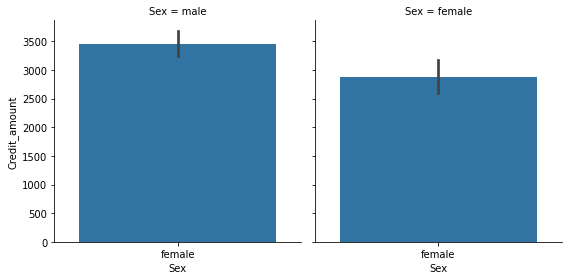

In [ ]:
g = sns.FacetGrid(df_new, col="Sex", col_wrap=2, height=4, aspect=1) # Form a facetgrid
g.map(sns.barplot, "Sex","Credit_amount") # map the above form facetgrid with attributes
plt.show() #Displays the plot

From above plot people of male gender have more Credit_amount compared to females. Credit rank determines the credit worthiness and social status of a person.

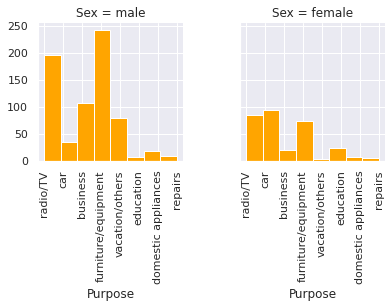

In [301]:
sns.set(rc={"figure.figsize":(15, 6)}) #Figure size
graph = sns.FacetGrid(df_new, col ='Sex') # Form a facetgrid
# map the above form facetgrid with attributes
graph.map(plt.hist, 'Purpose', bins = 8, color ='orange')
graph.set_xticklabels(rotation=90) #xlabel rotation
# show the object
plt.show()

Above plot shows that male people spend more on furniture/equipment and females spend more on car and radio/tv.In society, having things that can be bought by wealth, such as cars, houses, or fine clothing, are considered status symbols.

## Conclusion

Thus the dataset has been analyzed based on the credit worthiness of the customers. Various steps involved in this process are a basic exploration of data, finding Erroneous/wrong values, dealing with missing values, dealing with outliers, dealing with skewness of the data, Exploratory Data Analysis – Univariate, Bivariate, and Multivariate analysis, and finding the required insights from the data.